In [249]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [250]:
print(train_df.shape) #13개의 피쳐, transported는 target값
print(test_df.shape)

(8693, 14)
(4277, 13)


In [251]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## PassengerId, Name 칼럼 삭제

In [252]:
train_df.drop(['PassengerId','Name'], axis=1, inplace = True)

In [253]:
train_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


## NULL 값 확인

In [254]:
train_df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

### HomePlanet

In [255]:
train_df['HomePlanet'].value_counts(dropna=False)

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [256]:
train_df['HomePlanet'] = train_df['HomePlanet'].fillna('Earth')

In [257]:
train_df['HomePlanet'].value_counts(dropna=False)

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

### CryoSleep

In [258]:
train_df['CryoSleep'].value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [259]:
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(0)

In [260]:
train_df['CryoSleep'].value_counts(dropna=False)

False    5656
True     3037
Name: CryoSleep, dtype: int64

### Cabin

In [261]:
train_df['Cabin'] = train_df['Cabin'].fillna(train_df['Cabin'].mode()[0])

In [262]:
train_df['Cabin'].value_counts(dropna=False)

G/734/S     207
C/21/P        7
B/201/P       7
G/1368/P      7
E/13/S        7
           ... 
G/556/P       1
E/231/S       1
G/545/S       1
G/543/S       1
F/947/P       1
Name: Cabin, Length: 6560, dtype: int64

In [263]:
cabin_list = train_df["Cabin"].apply(lambda x: x.split("/"))

train_df["Cab_type"] = cabin_list.apply(lambda x: x[0])
train_df["Cab_room"] = cabin_list.apply(lambda x: float(x[1]))
train_df["Cab_ps"] = cabin_list.apply(lambda x: x[2])

In [264]:
train_df["Cab_type"]

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: Cab_type, Length: 8693, dtype: object

In [265]:
transported = train_df[train_df["Transported"]==1]["Cab_type"].value_counts()
not_transported = train_df[train_df["Transported"]==0]["Cab_type"].value_counts()

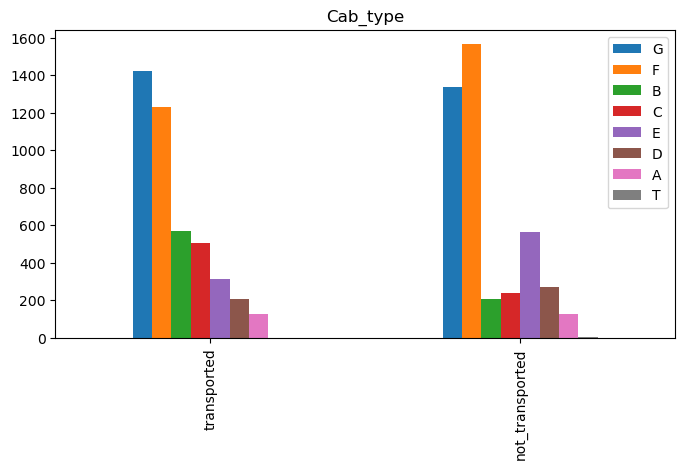

In [270]:
df = pd.DataFrame([transported, not_transported])
df.index = ['transported','not_transported']
df.plot(kind= 'bar',stacked= False , figsize= (8,4))
plt.title('Cab_type')
plt.show()

### Destination

In [192]:
train_df['Destination'].value_counts(dropna=False)

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: Destination, dtype: int64

In [193]:
train_df['Destination'] = train_df['Destination'].fillna(train_df['Destination'].mode()[0])

### ShoppingMall

In [194]:
train_df['ShoppingMall'].value_counts(dropna=False)

0.0       5587
NaN        208
1.0        153
2.0         80
3.0         59
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1116, dtype: int64

In [195]:
train_df['ShoppingMall'] = train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].mean())

In [196]:
train_df['ShoppingMall'].value_counts(dropna=False)

0.000000       5587
173.729169      208
1.000000        153
2.000000         80
3.000000         59
               ... 
3627.000000       1
2074.000000       1
871.000000        1
742.000000        1
1872.000000       1
Name: ShoppingMall, Length: 1116, dtype: int64

### VRDeck

In [197]:
train_df['VRDeck'].value_counts(dropna=False)

0.0       5495
NaN        188
1.0        139
2.0         70
3.0         56
          ... 
297.0        1
1788.0       1
1113.0       1
9244.0       1
3235.0       1
Name: VRDeck, Length: 1307, dtype: int64

In [198]:
train_df['VRDeck'] = train_df['VRDeck'].fillna(train_df['VRDeck'].mean())

### FoodCourt

In [199]:
train_df['FoodCourt'].value_counts(dropna=False)

0.0       5456
NaN        183
1.0        116
2.0         75
3.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1508, dtype: int64

In [200]:
train_df['FoodCourt'] = train_df['FoodCourt'].fillna(train_df['FoodCourt'].median())

### Spa

In [201]:
train_df['Spa'].value_counts(dropna=False)

0.0       5324
NaN        183
1.0        146
2.0        105
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Length: 1328, dtype: int64

In [202]:
train_df['Spa'] = train_df['Spa'].fillna(train_df['Spa'].mean())

### RoomService

In [203]:
train_df['RoomService'].value_counts(dropna=False)

0.0       5577
NaN        181
1.0        117
2.0         79
3.0         61
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1274, dtype: int64

In [204]:
train_df['RoomService'] = train_df['RoomService'].fillna(train_df['RoomService'].median())

### Age

In [205]:
train_df['Age'].value_counts(dropna=False)

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 81, dtype: int64

In [206]:
train_df['Age'].isna().sum()

179

In [207]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

### VIP

In [212]:
train_df['VIP'].isna().sum()

203

In [213]:
train_df['VIP']

0       False
1       False
2        True
3       False
4       False
        ...  
8688     True
8689    False
8690    False
8691    False
8692    False
Name: VIP, Length: 8693, dtype: object

<AxesSubplot: xlabel='VIP', ylabel='Transported'>

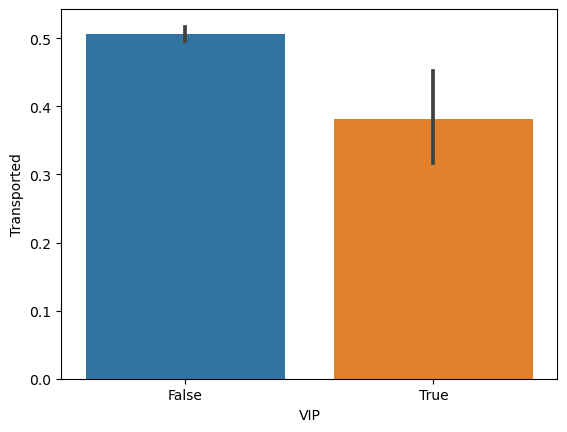

In [215]:
import seaborn as sns
sns.barplot(x = 'VIP', y = 'Transported', data = train_df)

In [217]:
train_df['VIP'] = train_df['VIP'].fillna(0)
train_df["VIP"] = train_df["VIP"].astype(int)

In [218]:
train_df['VIP'].value_counts(dropna=False)

0    8494
1     199
Name: VIP, dtype: int64

VIP일수록 transported 될 확률이 높다고 판단했지만, 그렇지 않았음.

### 결측치 처리 끝

In [219]:
train_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cab_type        0
Cab_room        0
Cab_ps          0
dtype: int64

In [220]:
train_df = train_df.drop('Cabin', axis = 1)

In [221]:
train_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cab_type        0
Cab_room        0
Cab_ps          0
dtype: int64

## 원핫인코딩

In [222]:
train_df = train_df.drop(['Transported'], axis = 1)
train_df = pd.get_dummies(train_df)
train_df

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cab_room,HomePlanet_Earth,HomePlanet_Europa,...,Cab_type_A,Cab_type_B,Cab_type_C,Cab_type_D,Cab_type_E,Cab_type_F,Cab_type_G,Cab_type_T,Cab_ps_P,Cab_ps_S
0,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,24.0,0,109.0,9.0,25.0,549.0,44.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,1,0.0,6819.0,0.0,1643.0,74.0,98.0,0,1,...,1,0,0,0,0,0,0,0,1,0
8689,18.0,0,0.0,0.0,0.0,0.0,0.0,1499.0,1,0,...,0,0,0,0,0,0,1,0,0,1
8690,26.0,0,0.0,0.0,1872.0,1.0,0.0,1500.0,1,0,...,0,0,0,0,0,0,1,0,0,1
8691,32.0,0,0.0,1049.0,0.0,353.0,3235.0,608.0,0,1,...,0,0,0,0,1,0,0,0,0,1
